# Network SIR implementaion

In [69]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Network parameters
N = 1000  # number of nodes
k = 10  # average degree
p = k / N  # edge probability

# Disease parameters
beta = 0.3  # transmission rate
gamma = 0.1  # recovery rate
I0 = 10  # initial number of infected nodes

In [4]:
def network_describe(G):
    # draw graph
    nx.draw(G, node_size = 10)
    plt.show()
    # Degree plot
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree plot')
    plt.show()
    # properties
    prop_dict = {}
    prop_dict['no_of_nodes'] = nx.number_of_nodes(G)
    prop_dict['no_of_edges'] = nx.number_of_edges(G)
    if nx.is_connected(G):
        prop_dict['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        prop_dict['diameter'] = nx.diameter(G)
    prop_dict['transitivity'] = nx.transitivity(G)
    prop_dict['average_clustering'] = nx.average_clustering(G)  #Global CC (or) CC for graph 
    prop_dict['edge_density'] = nx.classes.function.density(G)
    prop_dict['average_degree'] = np.array([d for n, d in G.degree()]).sum()/nx.number_of_nodes(G)
    prop_dict['total_triangles'] = np.array(list(nx.triangles(G).values())).sum()
    prop_dict['number_connected_components'] = nx.algorithms.components.number_connected_components(G)
    return prop_dict

In [5]:
def network_sir(N, G, I0, iteration = 100):
    # Initialize the states of the nodes
    states = np.zeros(N)
    states[:I0] = 1               # Set the first 'initial_infected' nodes as infected
    np.random.shuffle(states)     # Shuffle the order of the nodes

    # Run the simulation
    S = [N - I0]   # Number of susceptible individuals at each time step
    I = [I0]       # Number of infected individuals at each time step
    R = [0]        # Number of recovered individuals at each time step

    for t in range(1, iteration):
        new_infections = []
        new_recoveries = []
        for node in G.nodes():
            neighbors = list(G.neighbors(node))
            infected_neighbors = sum(states[neighbors])
            if states[node] == 0 and np.random.uniform() < beta * infected_neighbors / len(neighbors):
                new_infections.append(node)
            elif states[node] == 1 and np.random.uniform() < gamma:
                new_recoveries.append(node)

        # Update the states of the nodes
        for node in new_infections:
            states[node] = 1
        for node in new_recoveries:
            states[node] = 2

        # Record the number of individuals in each state
        S.append(sum(states == 0))
        I.append(sum(states == 1))
        R.append(sum(states == 2))
    
    return S, I, R

In [6]:
# Plot the results
def sir_plot(S, I, R):
    plt.plot(S, label='Susceptible')
    plt.plot(I, label='Infected')
    plt.plot(R, label='Recovered')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Number of individuals')
    plt.show()

### Fully connected graph

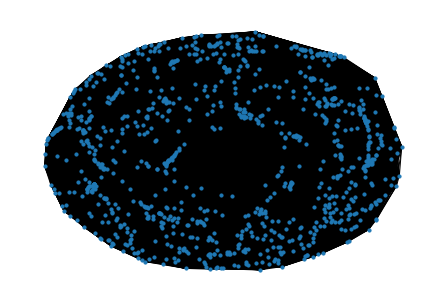

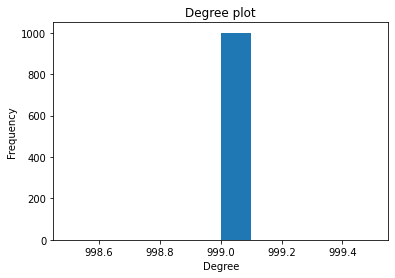

{'no_of_nodes': 1000,
 'no_of_edges': 499500,
 'average_shortest_path_length': 1.0,
 'diameter': 1,
 'transitivity': 1.0,
 'average_clustering': 1.0,
 'edge_density': 1.0,
 'average_degree': 999.0,
 'total_triangles': 498501000,
 'number_connected_components': 1}

In [22]:
fc = nx.complete_graph(N)
network_describe(fc)

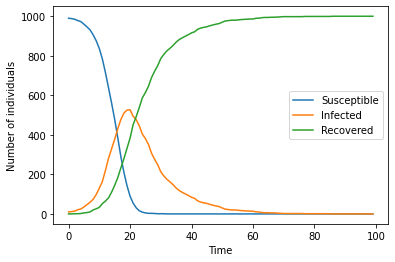

In [23]:
fc_S, fc_I, fc_R = network_sir(N, fc, I0)
sir_plot(fc_S, fc_I, fc_R)

### Binomial graph 

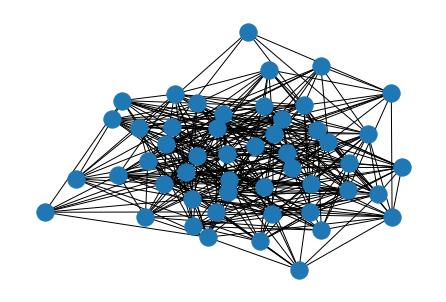

In [24]:
# small binomial graph, with probability p
er = nx.binomial_graph(50, 0.3)
nx.draw(er)

In [25]:
# Create Erdos-Renyi random graph, with probability p
er = nx.binomial_graph(N, p)

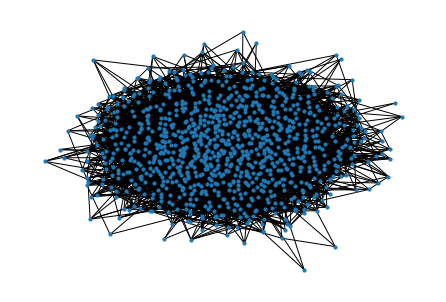

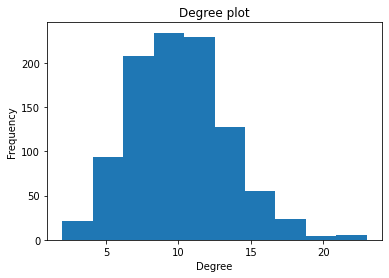

{'no_of_nodes': 1000,
 'no_of_edges': 5083,
 'average_shortest_path_length': 3.2343983983983984,
 'diameter': 5,
 'transitivity': 0.009501972290772012,
 'average_clustering': 0.009800330858474631,
 'edge_density': 0.010176176176176176,
 'average_degree': 10.166,
 'total_triangles': 489,
 'number_connected_components': 1}

In [9]:
network_describe(er)

In [26]:
er_S, er_I, er_R = network_sir(N, er, I0)

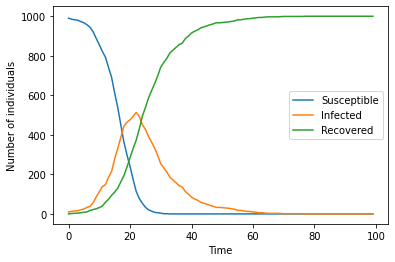

In [11]:
sir_plot(er_S, er_I, er_R)

### SIR model on a random network with Poisson degree distribution

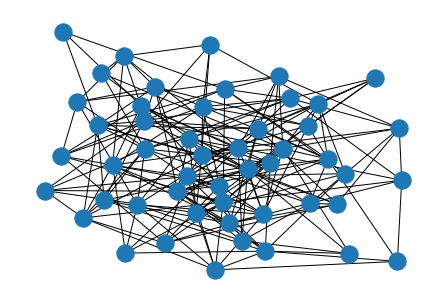

In [27]:
# small poisson degress distribution graph
degrees = np.random.poisson(k, 50)
poi = nx.configuration_model(degrees)
poi = nx.Graph(poi)
poi.remove_edges_from(nx.selfloop_edges(poi))
nx.draw(poi)

In [32]:
# Create a network with a Poisson degree distribution
degrees = np.random.poisson(k, N)
poi = nx.configuration_model(degrees)
poi = nx.Graph(poi)
poi.remove_edges_from(nx.selfloop_edges(poi))

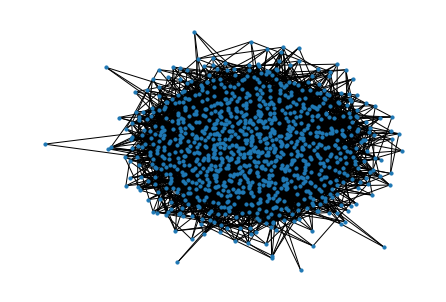

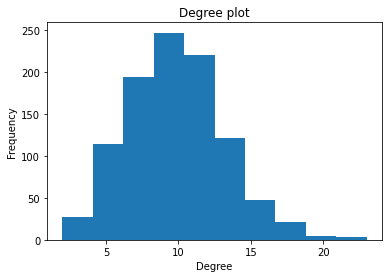

{'no_of_nodes': 1000,
 'no_of_edges': 4970,
 'average_shortest_path_length': 3.263661661661662,
 'diameter': 5,
 'transitivity': 0.011836354807381029,
 'average_clustering': 0.011482230609461744,
 'edge_density': 0.00994994994994995,
 'average_degree': 9.94,
 'total_triangles': 585,
 'number_connected_components': 1}

In [14]:
network_describe(poi)

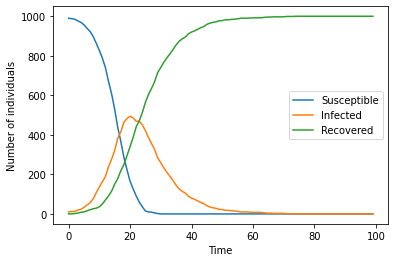

In [33]:
poi_S, poi_I, poi_R = network_sir(N, poi, I0)
sir_plot(poi_S, poi_I, poi_R)

### Random network with a power-law degree distribution

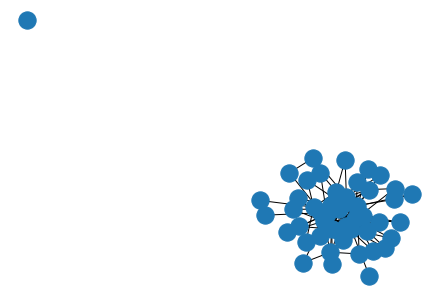

In [45]:
#small power_law network
k_min = 2  # minimum degree
k_max = 50  # maximum degree
alpha = 1.7  # power-law exponent

# Generate a random graph with a truncated power-law degree distribution
degree_seq = np.clip(nx.utils.powerlaw_sequence(50, exponent=alpha), k_min, k_max).astype(int)
pl = nx.configuration_model(degree_seq)

# Remove self-loops and parallel edges
pl = nx.Graph(pl)
pl.remove_edges_from(nx.selfloop_edges(pl))
nx.draw(pl)

In [46]:
k_min = 2  # minimum degree
k_max = 100  # maximum degree
alpha = 1.7  # power-law exponent

# Generate a random graph with a truncated power-law degree distribution
degree_seq = np.clip(nx.utils.powerlaw_sequence(N, exponent=alpha), k_min, k_max).astype(int)
pl = nx.configuration_model(degree_seq)

# Remove self-loops and parallel edges
pl = nx.Graph(pl)
pl.remove_edges_from(nx.selfloop_edges(pl))

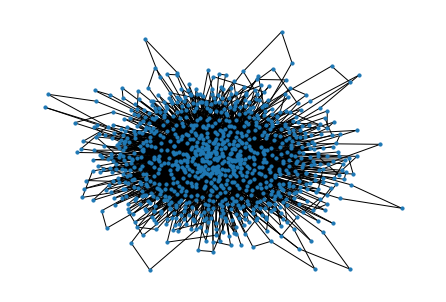

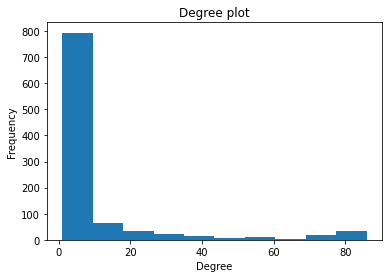

{'no_of_nodes': 1000,
 'no_of_edges': 5178,
 'average_shortest_path_length': 2.9816056056056057,
 'diameter': 6,
 'transitivity': 0.16780829383782936,
 'average_clustering': 0.20182669384252674,
 'edge_density': 0.010366366366366366,
 'average_degree': 10.356,
 'total_triangles': 38487,
 'number_connected_components': 1}

In [47]:
network_describe(pl)

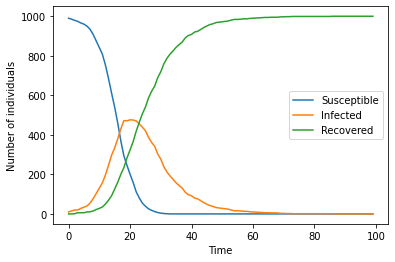

In [48]:
pl_S, pl_I, pl_R = network_sir(N, pl, I0)
sir_plot(pl_S, pl_I, pl_R)

### Watts–Strogatz small-world graph

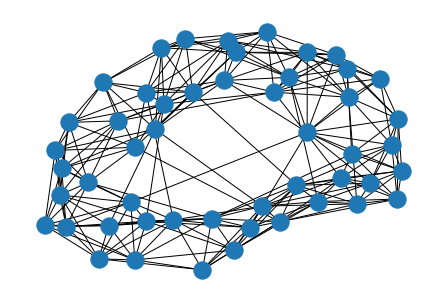

In [36]:
# small watts-strogatz graph
ws = nx.watts_strogatz_graph(50, 10, 0.1)
nx.draw(ws)

In [70]:
ws = nx.watts_strogatz_graph(N, k, 0.1)

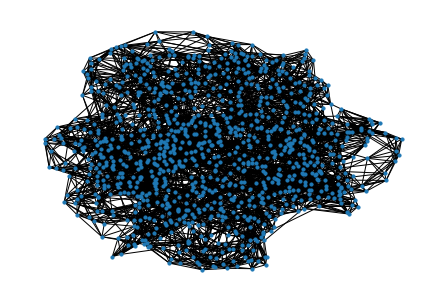

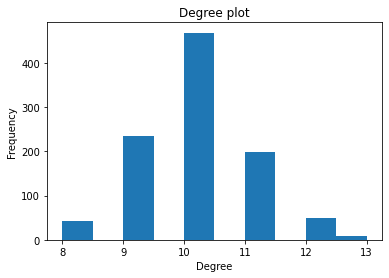

{'no_of_nodes': 1000,
 'no_of_edges': 5000,
 'average_shortest_path_length': 4.468996996996997,
 'diameter': 7,
 'transitivity': 0.48958975261906856,
 'average_clustering': 0.49774877344877405,
 'edge_density': 0.01001001001001001,
 'average_degree': 10.0,
 'total_triangles': 22245,
 'number_connected_components': 1}

In [23]:
network_describe(ws)

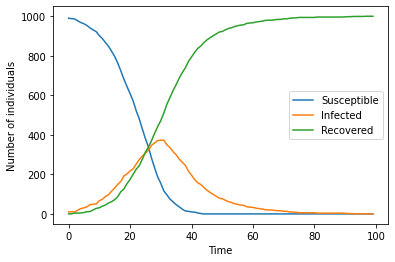

In [74]:
ws_S, ws_I, ws_R = network_sir(N, ws, I0)
sir_plot(ws_S, ws_I, ws_R)

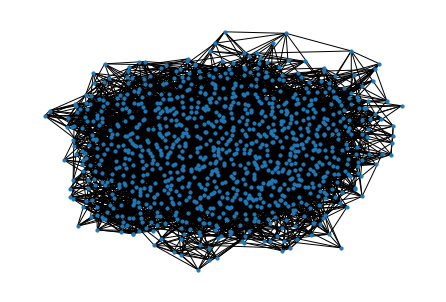

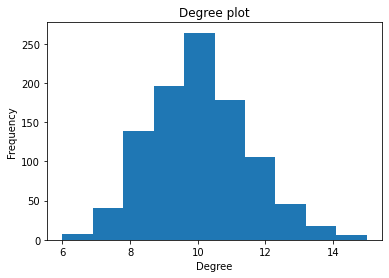

{'no_of_nodes': 1000,
 'no_of_edges': 5000,
 'average_shortest_path_length': 3.6104784784784787,
 'diameter': 6,
 'transitivity': 0.22607307020004747,
 'average_clustering': 0.23625128760128788,
 'edge_density': 0.01001001001001001,
 'average_degree': 10.0,
 'total_triangles': 10476,
 'number_connected_components': 1}

In [53]:
ws2 = nx.watts_strogatz_graph(N, k=10, p=0.3)
network_describe(ws2)

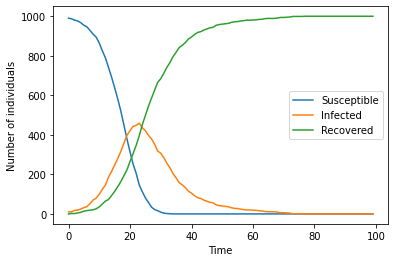

In [73]:
ws2_S, ws2_I, ws2_R = network_sir(N, ws2, I0)
sir_plot(ws2_S, ws2_I, ws2_R)

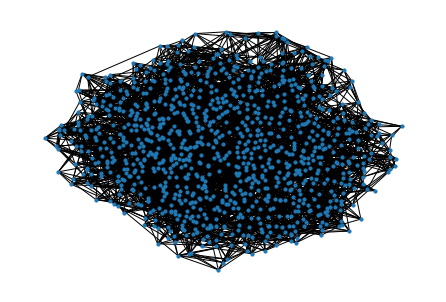

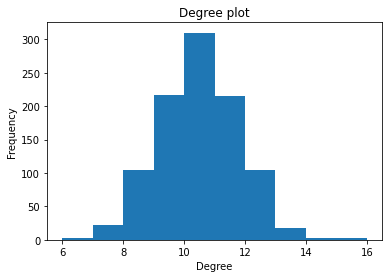

{'no_of_nodes': 1000,
 'no_of_edges': 5000,
 'average_shortest_path_length': 3.851935935935936,
 'diameter': 6,
 'transitivity': 0.3329265901117818,
 'average_clustering': 0.3420915917415915,
 'edge_density': 0.01001001001001001,
 'average_degree': 10.0,
 'total_triangles': 15279,
 'number_connected_components': 1}

In [65]:
ws3 = nx.watts_strogatz_graph(N, k=10, p=0.2)
network_describe(ws3)

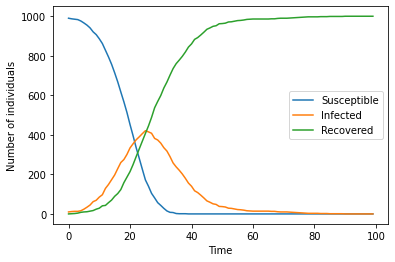

In [75]:
ws3_S, ws3_I, ws3_R = network_sir(N, ws3, I0)
sir_plot(ws3_S, ws3_I, ws3_R)

### Barabási–Albert preferential attachment model

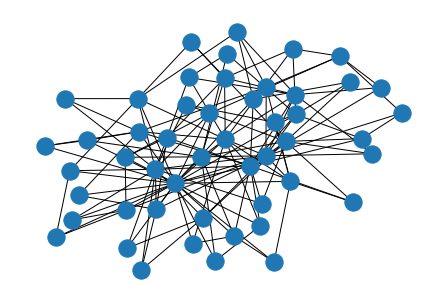

In [39]:
# small Barabási–Albert graph
ba = nx.barabasi_albert_graph(50, 3)
nx.draw(ba)

In [40]:
ba = nx.barabasi_albert_graph(N, 5)

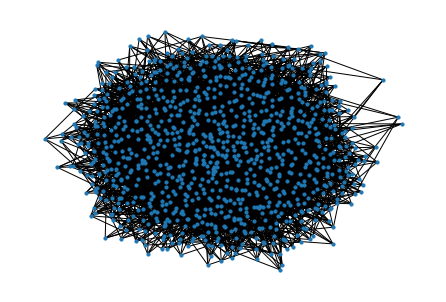

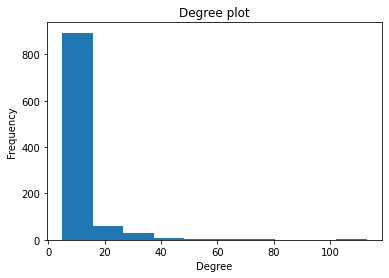

{'no_of_nodes': 1000,
 'no_of_edges': 4975,
 'average_shortest_path_length': 2.9776996996997,
 'diameter': 5,
 'transitivity': 0.029891445219753444,
 'average_clustering': 0.03984194923894697,
 'edge_density': 0.00995995995995996,
 'average_degree': 9.95,
 'total_triangles': 2883,
 'number_connected_components': 1}

In [27]:
network_describe(ba)

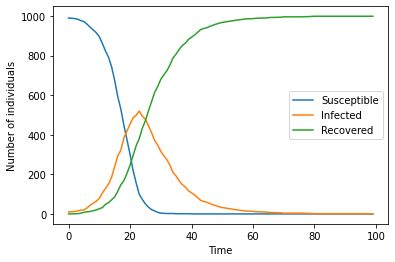

In [41]:
ba_S, ba_I, ba_R = network_sir(N, ba, I0)
sir_plot(ba_S, ba_I, ba_R)

### Comparison

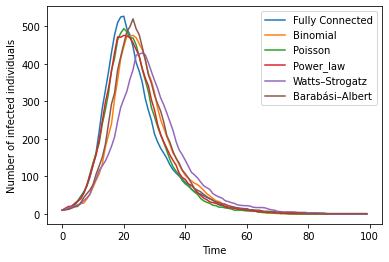

In [67]:
# Infected 
plt.plot(fc_I, label = 'Fully Connected')
plt.plot(er_I, label='Binomial')
plt.plot(poi_I, label='Poisson')
plt.plot(pl_I, label='Power_law')
plt.plot(ws3_I, label='Watts–Strogatz')
plt.plot(ba_I, label='Barabási–Albert')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of infected individuals')
plt.show()

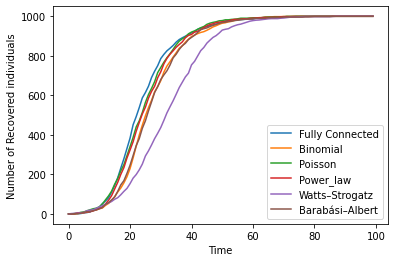

In [68]:
plt.plot(fc_R, label = 'Fully Connected')
plt.plot(er_R, label='Binomial')
plt.plot(poi_R, label='Poisson')
plt.plot(pl_R, label='Power_law')
plt.plot(ws_R, label='Watts–Strogatz')
plt.plot(ba_R, label='Barabási–Albert')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Recovered individuals')
plt.show()

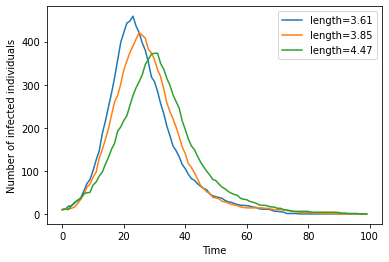

In [77]:
# Infected number of Watts–Strogatz small-world model with different path length
plt.plot(ws2_I, label='length=3.61')
plt.plot(ws3_I, label='length=3.85')
plt.plot(ws_I, label='length=4.47')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of infected individuals')
plt.show()

### Sexually transmitted disease with network

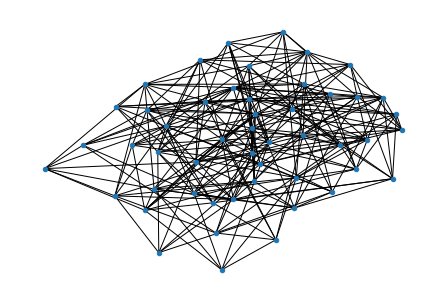

In [20]:
sex_trans = nx.gnm_random_graph(50,250)
nx.draw(sex_trans, node_size = 20)

In [17]:
# Parameters
M = 5000  # number of edges

# Generate a random graph for a sexually transmitted network
sex_trans = nx.gnm_random_graph(N, M)

# Add attributes to nodes
for node in sex_trans.nodes():
    # Randomly assign gender
    sex_trans.nodes[node]['gender'] = 'Male' if np.random.rand() < 0.5 else 'Female'
    # Randomly assign infection status
    sex_trans.nodes[node]['infected'] = True if np.random.rand() < 0.1 else False

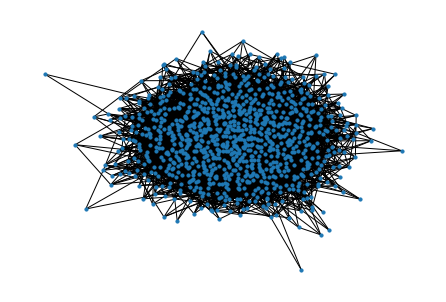

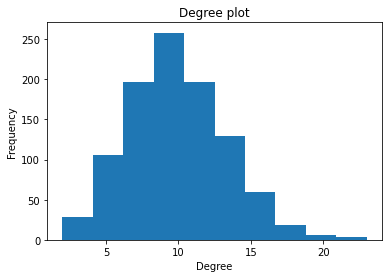

{'no_of_nodes': 1000,
 'no_of_edges': 5000,
 'average_shortest_path_length': 3.2553893893893893,
 'diameter': 6,
 'transitivity': 0.008560823754789271,
 'average_clustering': 0.008608587201823167,
 'edge_density': 0.01001001001001001,
 'average_degree': 10.0,
 'total_triangles': 429,
 'number_connected_components': 1}

In [18]:
network_describe(sex_trans)

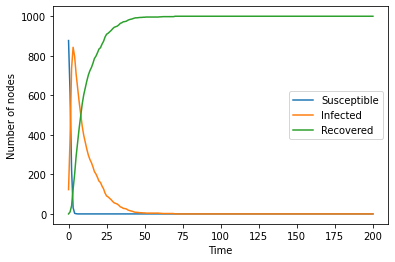

In [19]:
# Define the initial state of the network
infected_nodes = [node for node in sex_trans.nodes() if sex_trans.nodes[node]['infected']]
S = set(sex_trans.nodes()) - set(infected_nodes)
I = set(infected_nodes)
R = set()

# Define the dynamics of the SIR model
def sir_dynamics(S, I, R):
    new_I = set()
    new_R = set()
    for i in I:
        for j in sex_trans.neighbors(i):
            if j in S and np.random.rand() < beta:
                new_I.add(j)
        if np.random.rand() < gamma:
            new_R.add(i)
    S = S - new_I
    I = I.union(new_I) - new_R
    R = R.union(new_R)
    return S, I, R

# Simulate the SIR model over time
num_steps = 200
s_counts = [len(S)]
i_counts = [len(I)]
r_counts = [len(R)]
for step in range(num_steps):
    S, I, R = sir_dynamics(S, I, R)
    s_counts.append(len(S))
    i_counts.append(len(I))
    r_counts.append(len(R))

# Plot the results
plt.plot(s_counts, label='Susceptible')
plt.plot(i_counts, label='Infected')
plt.plot(r_counts, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of nodes')
plt.legend()
plt.show()